<center>
<p font="TH SarabunPSK" size="16"><b>ภาคผนวกโปรแกรม</b></p>
</center>

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# define fuzzi universe 
humid = ctrl.Antecedent(np.arange(0,101,1), 'humidity')
wSpeed = ctrl.Antecedent(np.arange(0,50,0.5), 'Wind_Speed')
rainy = ctrl.Consequent(np.arange(0,101,1), 'Rain_Probability')

In [3]:
#define fuzzi membership function
#triangle function
humid['low'] = fuzz.trimf(humid.universe, [0,0,40])
humid['medium'] = fuzz.trimf(humid.universe, [30,50,70])
humid['high'] = fuzz.trimf(humid.universe, [60,100,100])
#trapezoid funcyion
wSpeed['low'] = fuzz.trapmf(wSpeed.universe, [0,0,10,20])
wSpeed['medium'] = fuzz.trapmf(wSpeed.universe, [10,20,30,40])
wSpeed['high'] = fuzz.trapmf(wSpeed.universe, [30,40,50,50])
#triangle function
rainy['low'] = fuzz.trimf(rainy.universe, [0,0,40])
rainy['medium'] = fuzz.trimf(rainy.universe, [30,50,70])
rainy['high'] = fuzz.trimf(rainy.universe, [60,100,100])

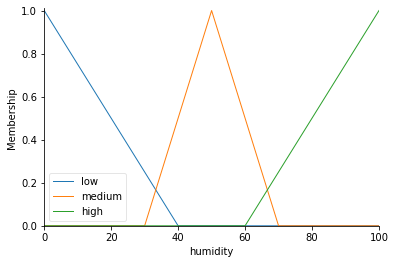

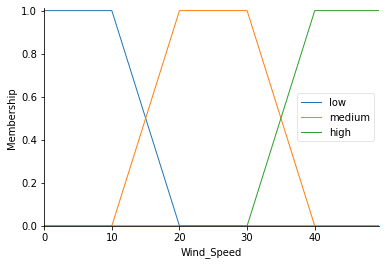

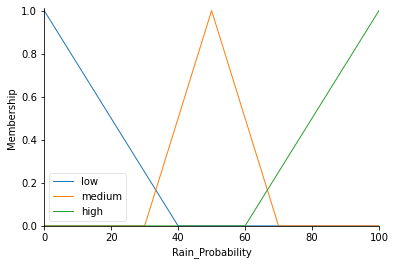

In [4]:
#view fuzzi membership function
humid.view()
wSpeed.view()
rainy.view()
plt.show()

In [5]:
#define fuzzi rule
rule1 = ctrl.Rule(antecedent=((humid['low'] & wSpeed['low']) |
                              (humid['low'] & wSpeed['medium']) |
                              (humid['medium'] & wSpeed['low'])),
                  consequent=rainy['low'], label='low')

rule2 = ctrl.Rule(antecedent=((humid['low'] & wSpeed['high']) |
                              (humid['medium'] & wSpeed['medium']) |
                              (humid['high'] & wSpeed['low'])),
                  consequent=rainy['medium'], label='medium')

rule3 = ctrl.Rule(antecedent=((humid['medium'] & wSpeed['high']) |
                              (humid['high'] & wSpeed['medium']) |
                              (humid['high'] & wSpeed['high'])),
                  consequent=rainy['high'], label='high')


In [6]:
# add rules to conctrol system
rainy_prediction_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
rainyProbability = ctrl.ControlSystemSimulation(rainy_prediction_ctrl)

In [7]:
rainyProbability.input['humidity'] = 35
rainyProbability.input['Wind_Speed'] = 15
rainyProbability.compute()

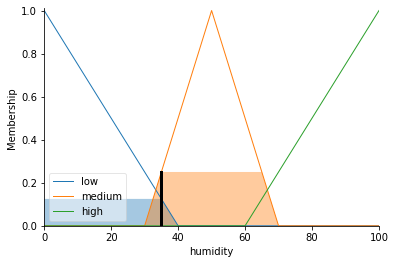

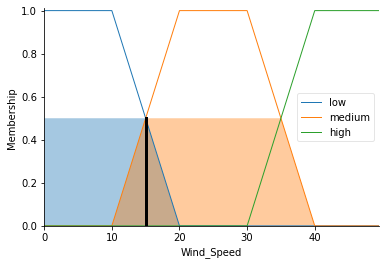

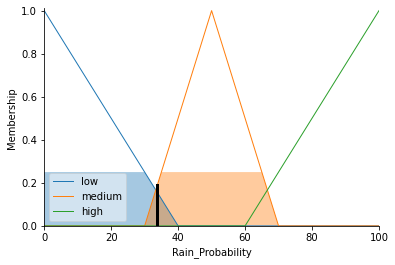

In [8]:
humid.view(sim=rainyProbability)
wSpeed.view(sim=rainyProbability)
rainy.view(sim=rainyProbability)
plt.show()

In [9]:
print(rainyProbability.output['Rain_Probability'])

33.7776111944028
